In [1]:
import pandas as pd
import numpy as np
import pandas.api.types as pdtypes

from plotnine import (
    ggplot,
    aes,
    stage,
    geom_violin,
    geom_point,
    geom_line,
    geom_boxplot,
    guides,
    scale_fill_manual,
    theme,
    theme_classic,
)

### Violins, Boxes, Points & Lines

*Comparing repeated measurements and their summaries*

Suppose you have two sets of related data and each point in the first set maps onto a point in the second set. e.g. they could represent a transition from one state to another for example two measurements of the height of pupils in different years.

For demonstration we shall generate data with a `before` measurement and an `after` measurement.

In [2]:
np.random.seed(123)
n = 20
mu = (1, 2.3)
sigma = (1, 1.6)

before = np.random.normal(loc=mu[0], scale=sigma[0], size=n)
after = np.random.normal(loc=mu[1], scale=sigma[1], size=n)

df = pd.DataFrame(
    {
        "value": np.hstack([before, after]),
        "when": np.repeat(["before", "after"], n),
        "id": np.hstack([range(n), range(n)]),
    }
)

df["when"] = df["when"].astype(pdtypes.CategoricalDtype(categories=["before", "after"]))
df.head()

,value,when,id
0,-0.085631,before,0
1,1.997345,before,1
2,1.282978,before,2
3,-0.506295,before,3
4,0.421400,before,4


A basic violin plot shows distributions of the two sets of data.

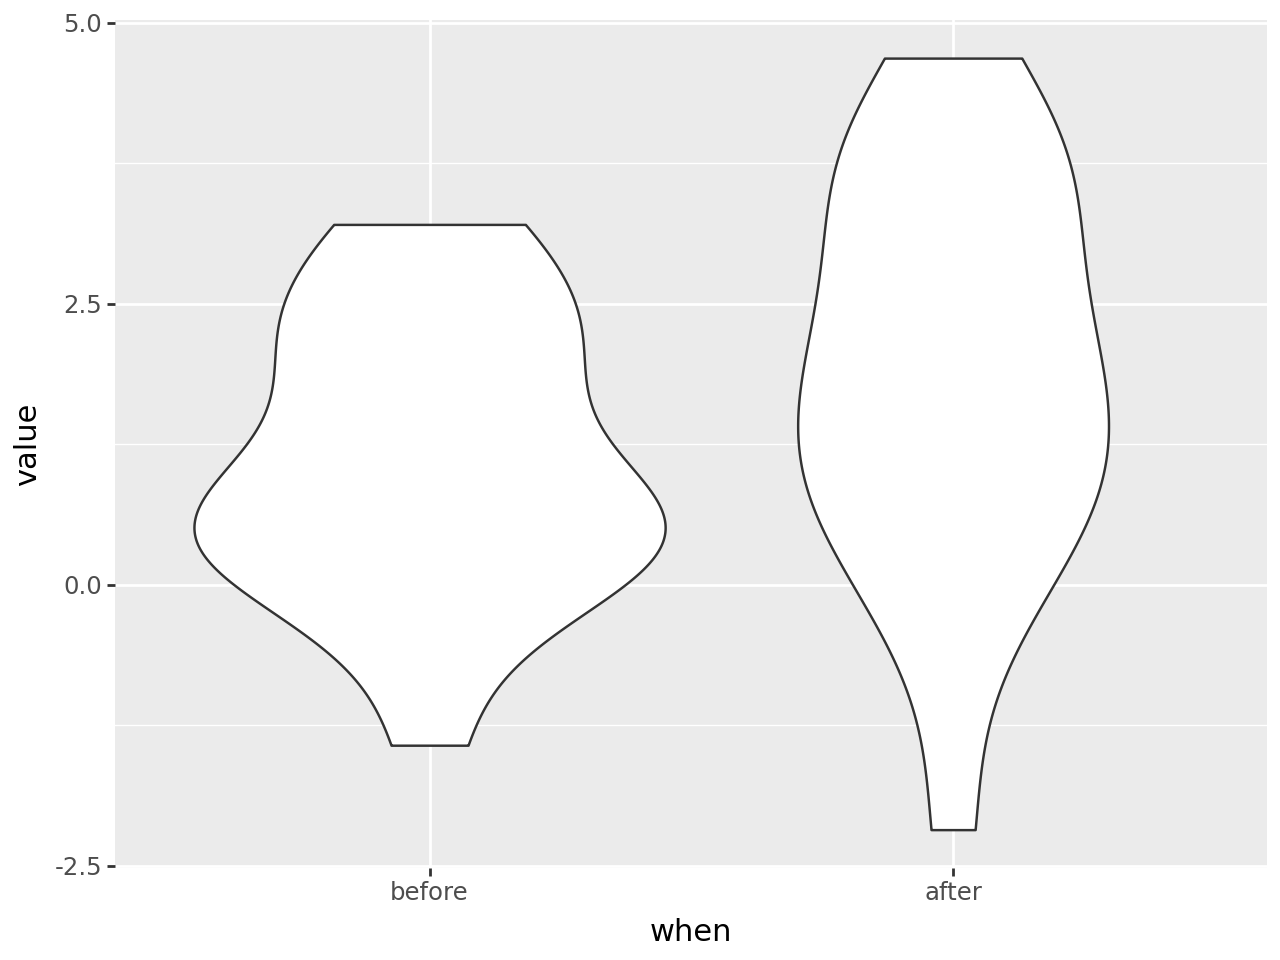

In [3]:
(
    ggplot(df, aes("when", "value"))
    + geom_violin(df)
)

Add the original data in form of points.

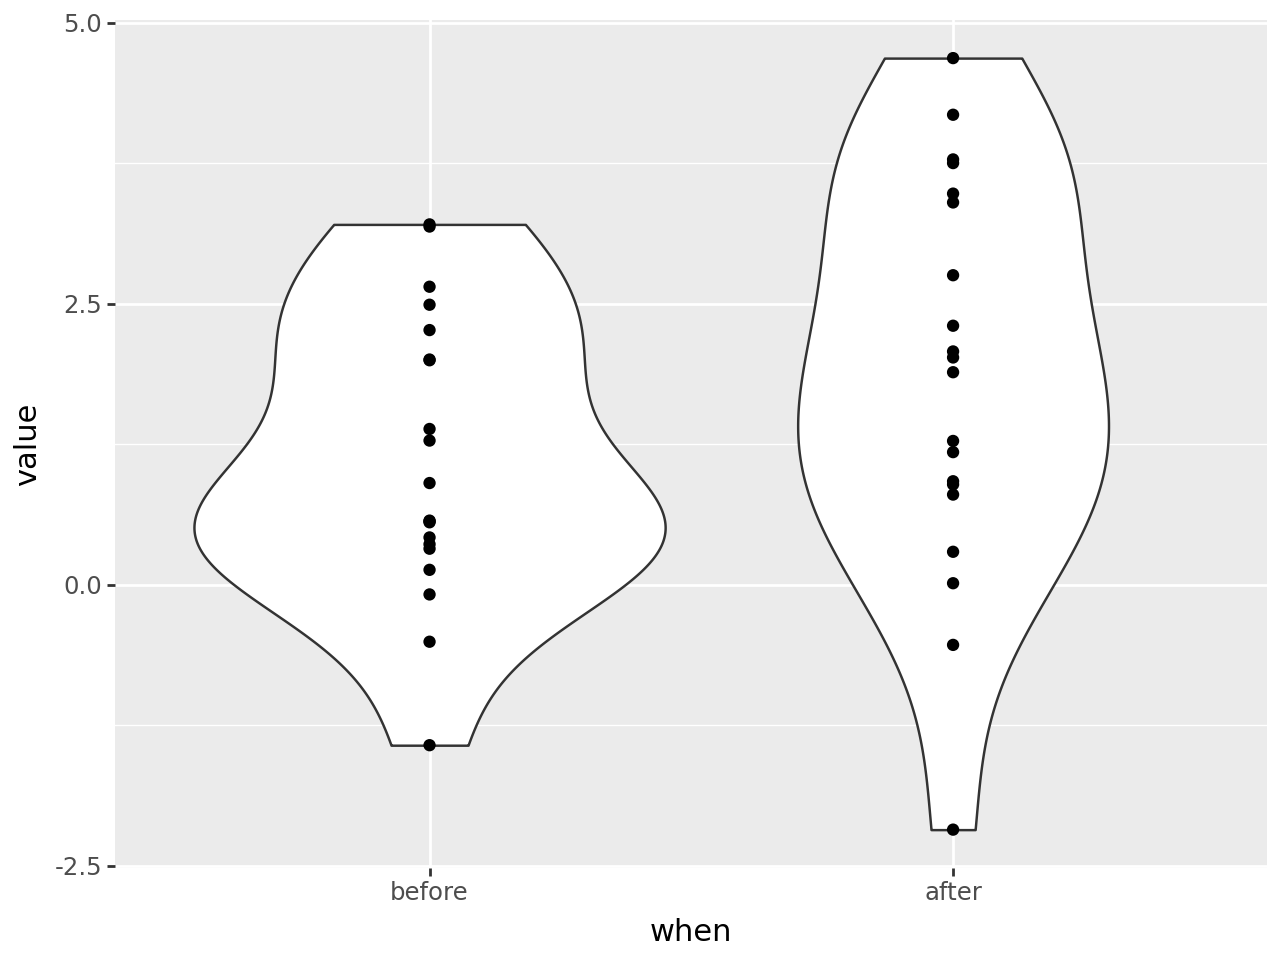

In [4]:
(
    ggplot(df, aes("when", "value"))
    + geom_violin(df)
    + geom_point()
)

The violins are symmetrical about the vertical axis and half a violin has the same information as the full violin.
We cut (style) the violins in half and choose to alternate with the left half for the first one and the right half for the second.

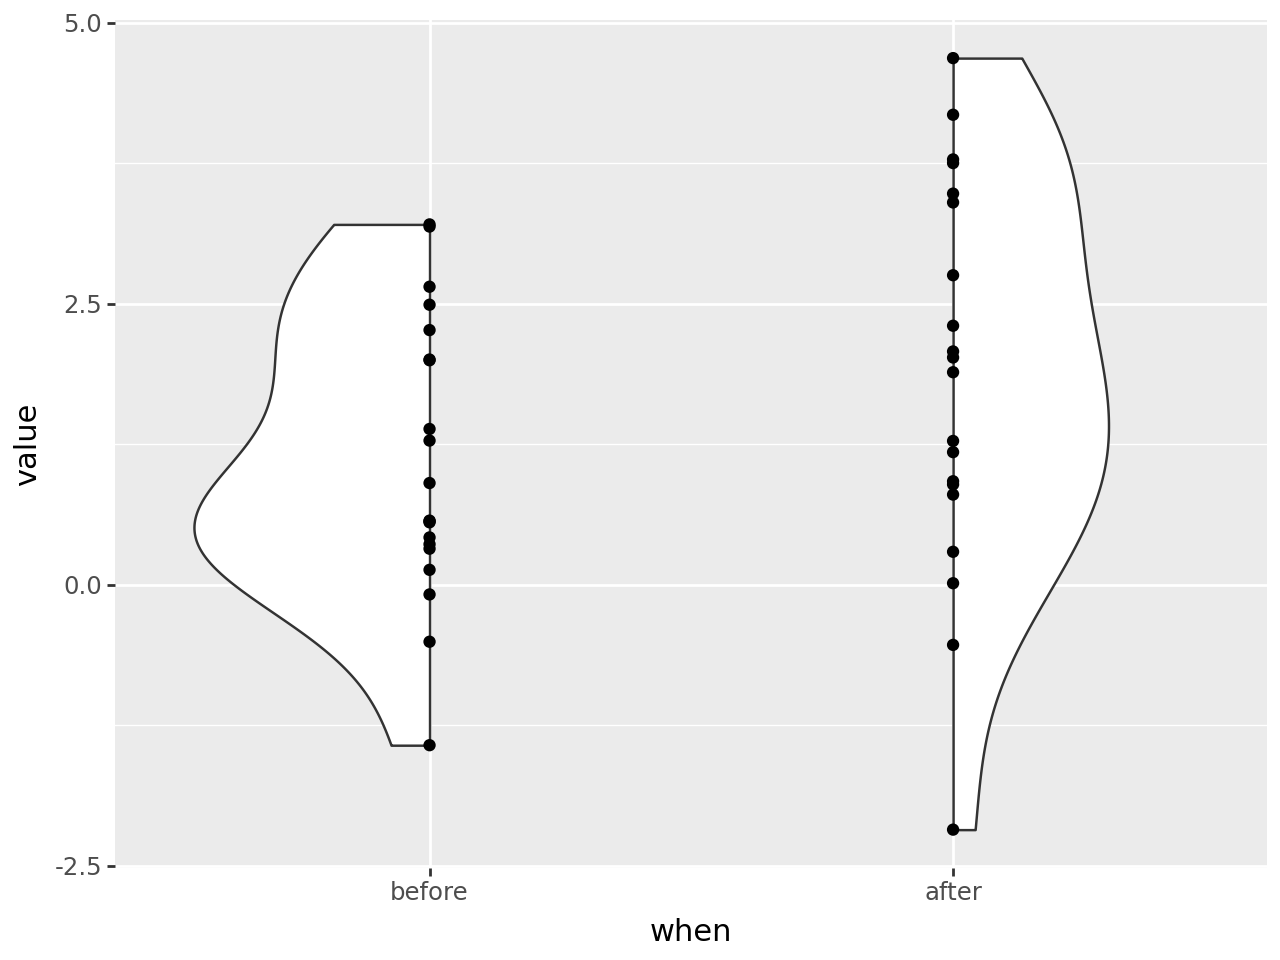

In [5]:
(
    ggplot(df, aes("when", "value"))
    + geom_violin(df, style="left-right")  # changed
    + geom_point()
)

Link up the points to get a sense of how the data the moves.

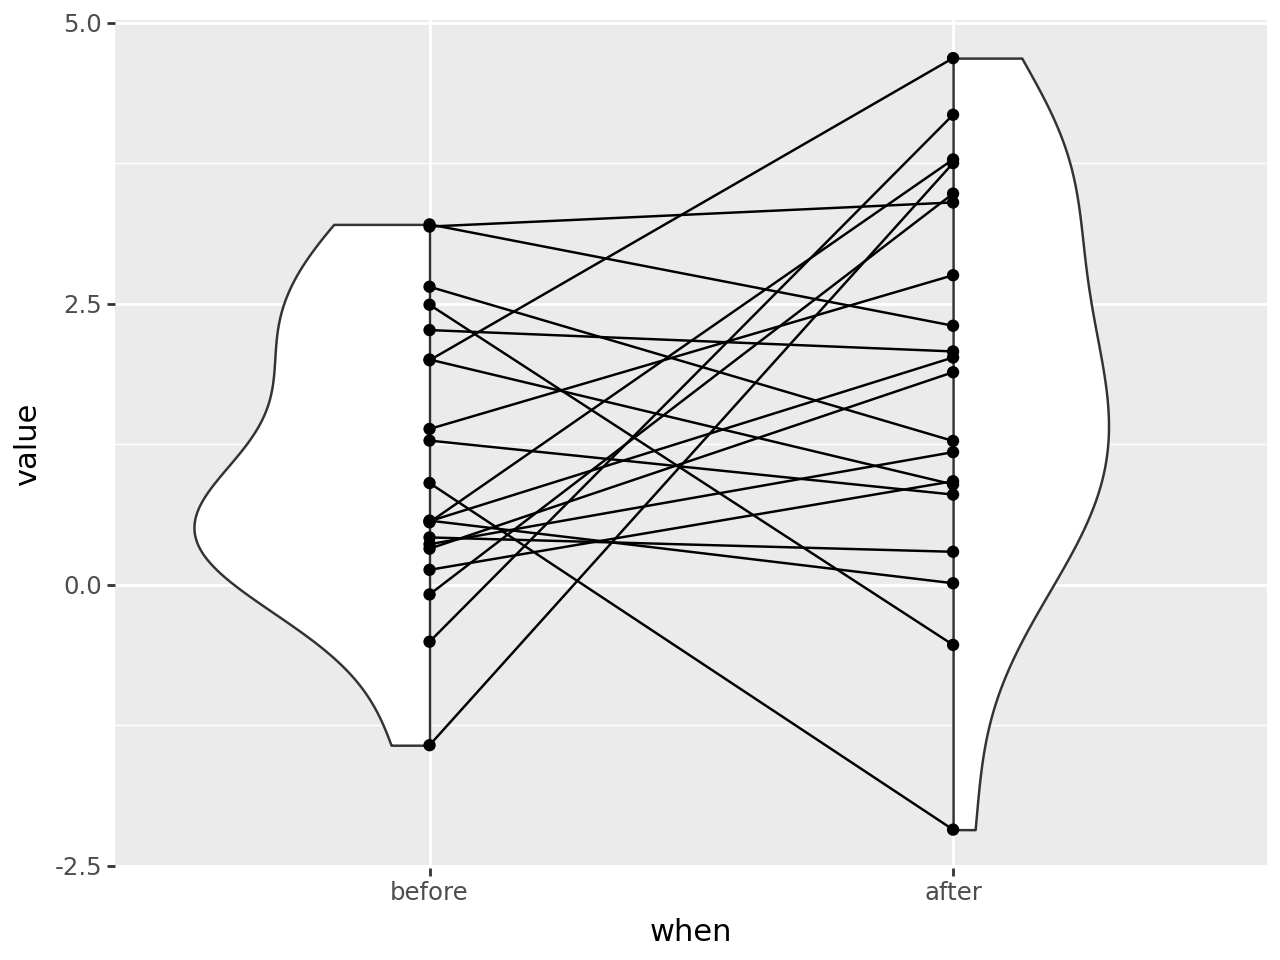

In [6]:
(
    ggplot(df, aes("when", "value"))
    + geom_violin(df, style="left-right")  # changed
    + geom_point()
    + geom_line(aes(group="id"))  # new
)

Make gap between the points and the violions. i.e. shift the violins outward and the points & lines inward. We used `stage` mapping to get it done. For example

```python
x=stage('when', after_scale='x+shift*alt_sign(x)')
```

says, map the `x`aesthetic to the 'when' column/variable and after the scale computed the `x` locations add a `shift` to them. The calculated `x` locations of a discrete scale are consecutive numbers `1, 2, 3, ...`, so we use that move objects of adjacent groups in opposite directions i.e $(-1)^1, (-1)^2, (-1)^3 ... = -1, 1, -1... $

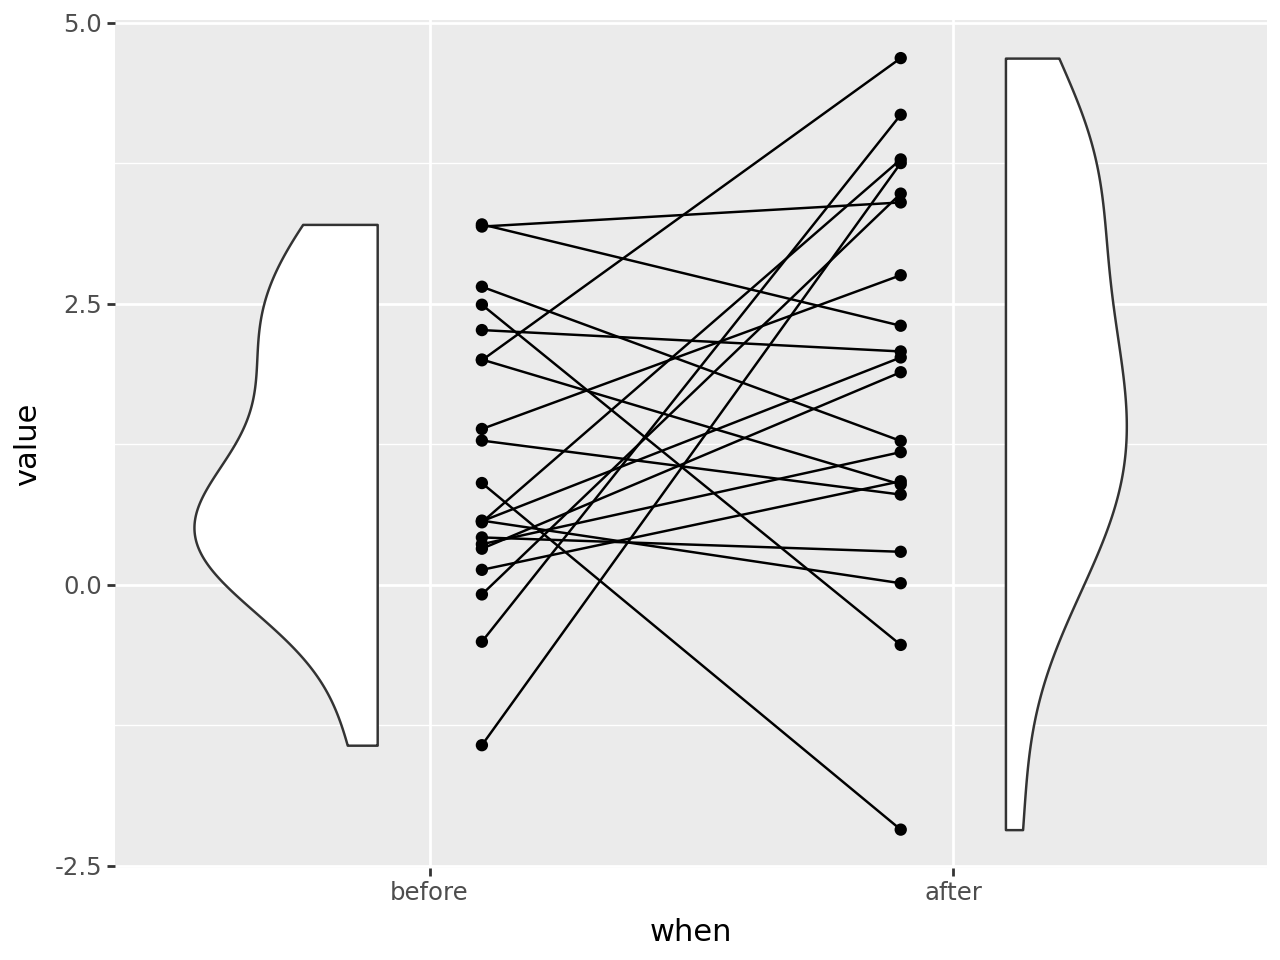

In [7]:
# How much to shift the violin, points and lines
# 0.1 is 10% of the allocated space for the category
shift = 0.1


def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    return (-1) ** x


m1 = aes(x=stage("when", after_scale="x+shift*alt_sign(x)"))  # shift outward
m2 = aes(x=stage("when", after_scale="x-shift*alt_sign(x)"), group="id")  # shift inward

(
    ggplot(df, aes("when", "value"))
    + geom_violin(m1, style="left-right")  # changed
    + geom_point(m2)  # changed
    + geom_line(m2)  # changed
)

Add a boxplot in the gap. The space between the flat edge of the violin and the center of the points is `2 * shift`, so we can use the `shift` to control the width of the boxplot.

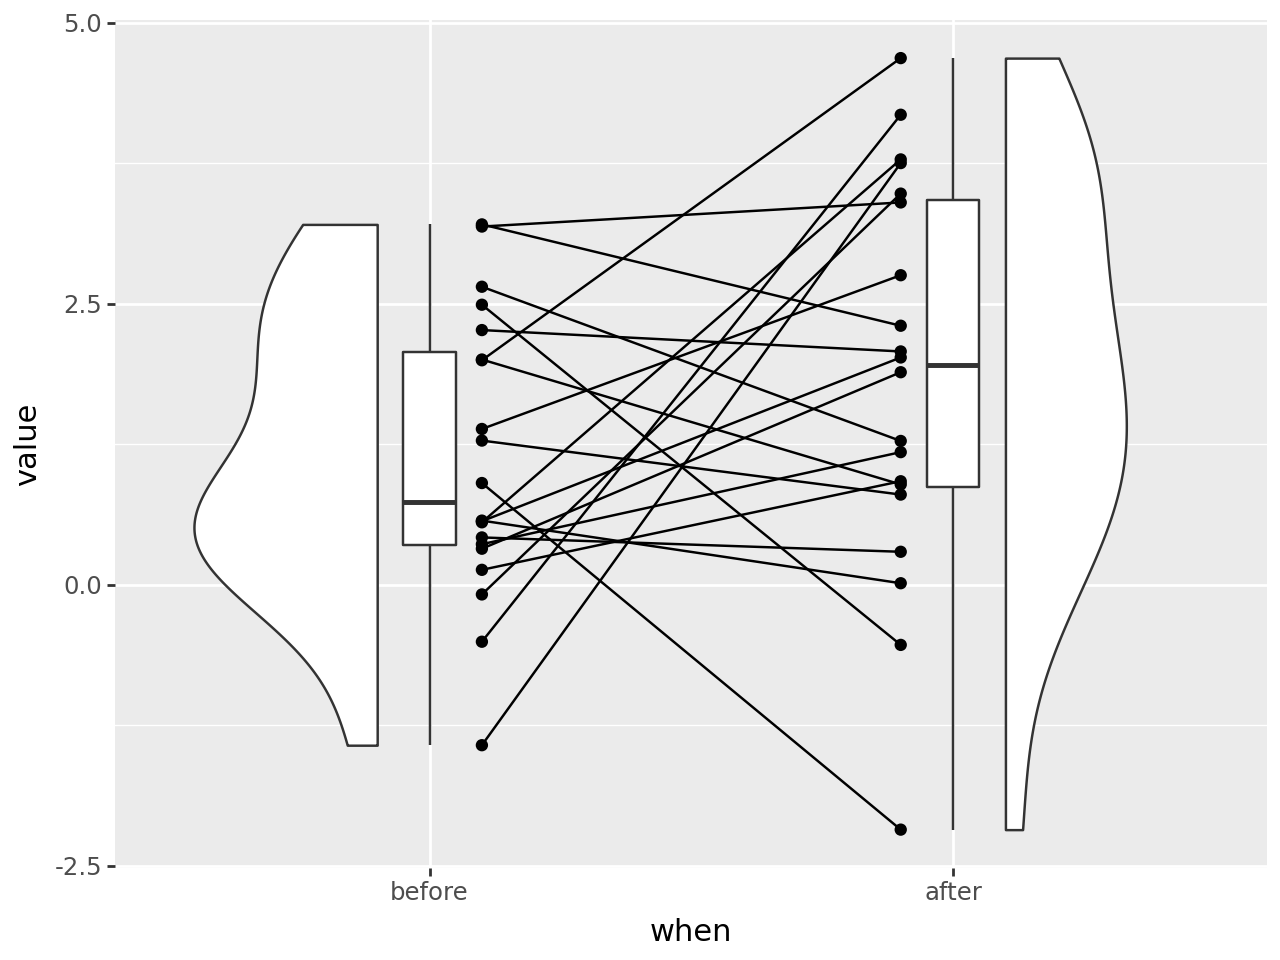

In [8]:
(
    ggplot(df, aes("when", "value"))
    + geom_violin(m1, style="left-right")
    + geom_point(m2)
    + geom_line(m2)
    + geom_boxplot(width=shift)
)

Finall, style it up.

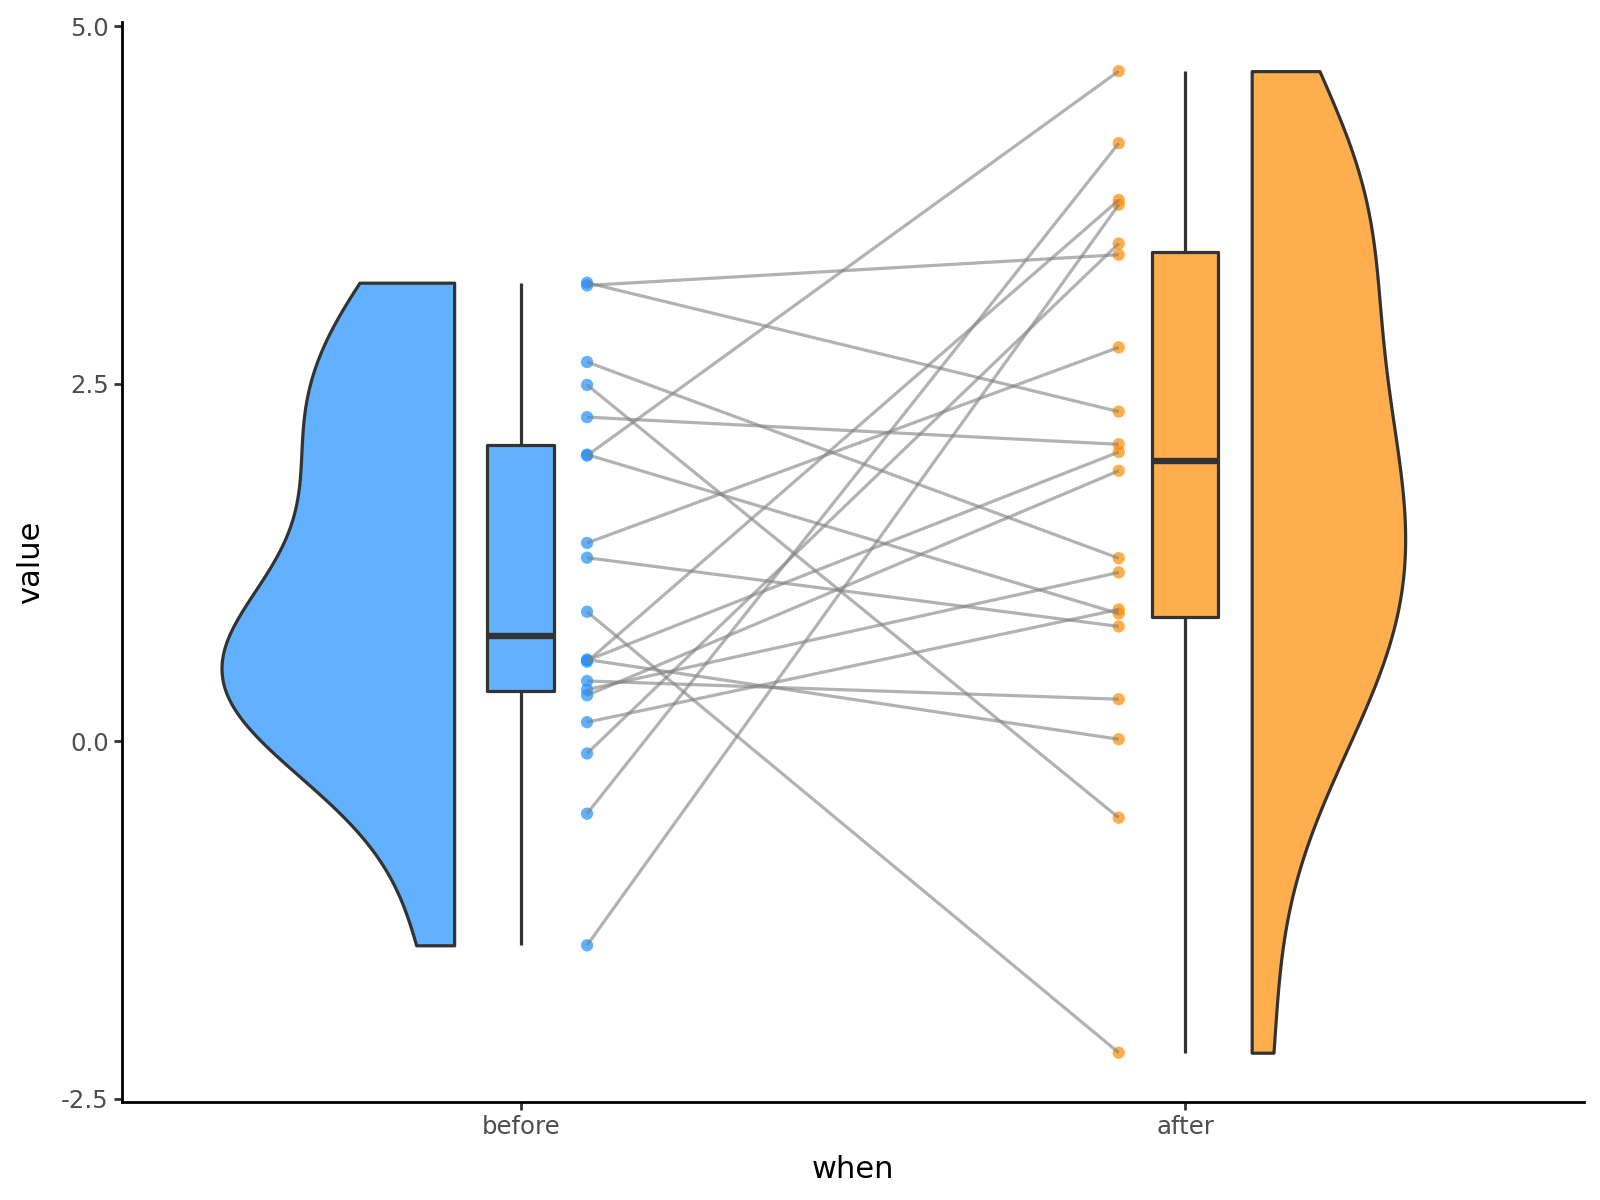

In [9]:
# Gallery, distributions

lsize = 0.65
fill_alpha = 0.7

(
    ggplot(df, aes("when", "value", fill="when"))
    + geom_violin(m1, style="left-right", alpha=fill_alpha, size=lsize)
    + geom_point(m2, color="none", alpha=fill_alpha, size=2)
    + geom_line(m2, color="gray", size=lsize, alpha=0.6)
    + geom_boxplot(width=shift, alpha=fill_alpha, size=lsize)
    + scale_fill_manual(values=["dodgerblue", "darkorange"])
    + guides(fill=False)  # Turn off the fill legend
    + theme_classic()
    + theme(figure_size=(8, 6))
)

**Credit:** This is example is motivated by the work of [Jordy van Langen](https://github.com/jorvlan) (@jorvlan) at https://github.com/jorvlan/open-visualizations.